In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import pandas as pd

In [17]:
x = [0.20,0.58,1.55,1.56,1.81,1.83,2.12,2.91,3.04,3.74,4.31,5.24,5.98,6.01,7.08,7.31,8.32,8.66,9.50,9.69]
y = [-6.04,14.11,10.91,5.87,34.04,17.05,17.69,-9.70,-3.46,-10.24,-29.98,-13.44,-11.85,-8.29,8.29,35.73,17.69,3.24,6.58,-17.62]

In [18]:
x = np.array(x).reshape((-1, 1))
y = np.array(y).reshape((-1, 1))
x,y

(array([[0.2 ],
        [0.58],
        [1.55],
        [1.56],
        [1.81],
        [1.83],
        [2.12],
        [2.91],
        [3.04],
        [3.74],
        [4.31],
        [5.24],
        [5.98],
        [6.01],
        [7.08],
        [7.31],
        [8.32],
        [8.66],
        [9.5 ],
        [9.69]]),
 array([[ -6.04],
        [ 14.11],
        [ 10.91],
        [  5.87],
        [ 34.04],
        [ 17.05],
        [ 17.69],
        [ -9.7 ],
        [ -3.46],
        [-10.24],
        [-29.98],
        [-13.44],
        [-11.85],
        [ -8.29],
        [  8.29],
        [ 35.73],
        [ 17.69],
        [  3.24],
        [  6.58],
        [-17.62]]))

# Modelo

In [19]:
# Crear modelo SVR
model = SVR(kernel='rbf', C=100, gamma='scale')
model.fit(x, y)

/home/gcasas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=100)

In [20]:
# Generar nuevos datos para predicción
x_new = np.linspace(0, 12, 100)[:, np.newaxis]
y_pred = model.predict(x_new)

# Escalar datos


transformar los valores de las características de forma que estén entre un rango [a, b], típicamente [0, 1] o [-1, 1].

In [21]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Crear modelo SVR con datos escalados
model_scaled = SVR(kernel='rbf', C=100, gamma='scale')
model_scaled.fit(x_scaled, y)

X_new_scaled = scaler.transform(x_new)
y_pred_scaled = model_scaled.predict(X_new_scaled)

/home/gcasas/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Prediccion
## Predicir otros valores que no estan en el dataset

In [22]:
x_pred = np.array([4, 6, 8])[:, np.newaxis]
x_pred_scaled = scaler.transform(x_pred)
y_pred_pred = model_scaled.predict(x_pred_scaled)

## Grafica

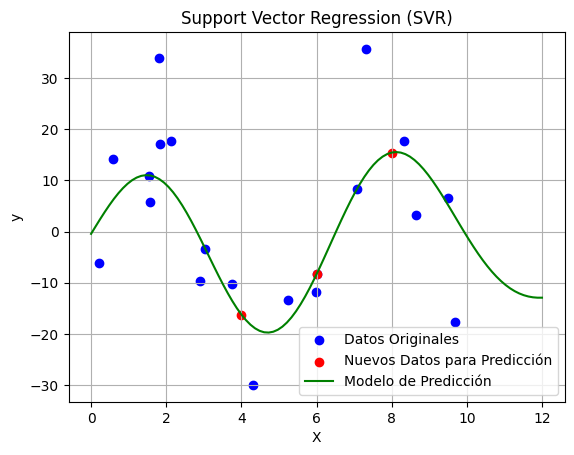

In [24]:
# Gráfico de los datos y los modelos SVR
plt.scatter(x, y, color='blue', label='Datos Originales')
plt.scatter(x_pred, y_pred_pred, color='red', label='Nuevos Datos para Predicción')
plt.plot(x_new, y_pred_scaled, color='green', label='Modelo de Predicción')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Support Vector Regression (SVR)')
plt.legend()
plt.grid(True)
plt.show()